In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/HDAI/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/HDAI/mitbih_test.csv
/content/drive/MyDrive/HDAI/mitbih_train.csv
/content/drive/MyDrive/HDAI/electrocardiogram.zip


In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/HDAI/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/drive/MyDrive/HDAI/mitbih_test.csv',header=None)

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,0.030992,0.028926,0.035124,0.026860,0.039256,0.035124,0.043388,0.047521,0.053719,0.053719,0.070248,0.072314,0.084711,0.097107,0.121901,0.132231,0.169421,0.196281,0.214876,0.235537,0.254132,0.264463,0.285124,0.272727,0.266529,0.239669,0.214876,0.173554,0.157025,0.123967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,0.304029,0.336996,0.377289,0.391941,0.439560,0.446886,0.457875,0.479853,0.512821,0.534799,0.586081,0.586081,0.604396,0.633700,0.615385,0.582418,0.564103,0.520147,0.490842,0.490842,0.468864,0.454212,0.450549,0.465201,0.450549,0.432234,0.424908,0.410256,0.391941,0.369963,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,0.106195,0.141593,0.128319,0.150442,0.132743,0.150442,0.132743,0.150442,0.123894,0.163717,0.137168,0.141593,0.132743,0.150442,0.128319,0.146018,0.119469,0.123894,0.101770,0.092920,0.070796,0.079646,0.066372,0.070796,0.079646,0.092920,0.088496,0.084071,0.079646,0.088496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,0.102083,0.122917,0.150000,0.168750,0.172917,0.170833,0.168750,0.164583,0.156250,0.152083,0.147917,0.147917,0.145833,0.145833,0.141667,0.141667,0.147917,0.158333,0.168750,0.179167,0.191667,0.206250,0.220833,0.239583,0.258333,0.275000,0.287500,0.308333,0.320833,0.331250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,0.080537,0.104027,0.093960,0.117450,0.097315,0.134228,0.124161,0.161074,0.171141,0.194631,0.204698,0.261745,0.275168,0.332215,0.345638,0.395973,0.406040,0.456376,0.446309,0.446309,0.399329,0.369128,0.308725,0.295302,0.265101,0.271812,0.258389,0.268456,0.261745,0.281879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

In [ ]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


Number of Samples: 109446
Number of Categories: 5
Sampling Frequency: 125Hz
Data Source: Physionet's MIT-BIH Arrhythmia Dataset
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

-N : Non-ecotic beats (normal beat) -S : Supraventricular ectopic beats -V : Ventricular ectopic beats -F : Fusion Beats -Q : Unknown Beats

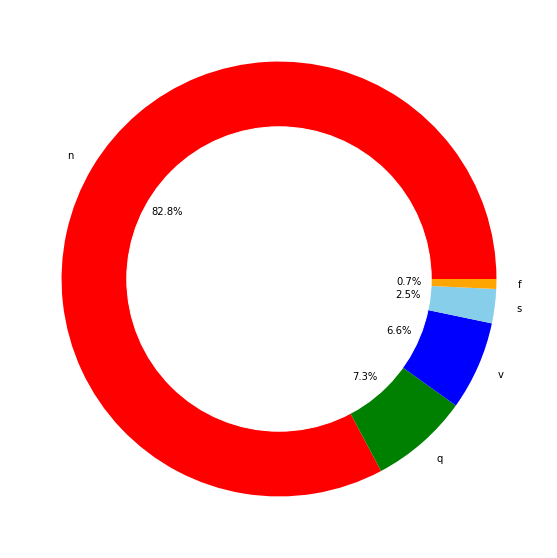

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1] 
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]

In [ ]:
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42) ##n=72471-> down sampling
df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123) ##upsampling
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

In [ ]:
train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample]) ## resampling data concat

In [ ]:
train_df.shape

(100000, 188)

In [ ]:
equilibre=train_df[187].value_counts()
print(equilibre) ## 비율 일정하게 설정

4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


In [ ]:
sample_187=train_df.groupby([187],group_keys=False).apply(lambda train_df : train_df.sample(1)) ## groupby 187 value에 따라 sample 1씩 추출

In [ ]:
train_df.groupby(187,group_keys=False)

In [ ]:
sample_187

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
67913,0.945055,0.774725,0.151099,0.016484,0.145604,0.247253,0.274725,0.274725,0.291209,0.285714,0.299451,0.288462,0.315934,0.299451,0.329670,0.326923,0.340659,0.351648,0.395604,0.406593,0.445055,0.458791,0.483516,0.480769,0.505495,0.486264,0.491758,0.469780,0.469780,0.428571,0.420330,0.390110,0.362637,0.340659,0.351648,0.337912,0.343407,0.321429,0.340659,0.315934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74297,1.000000,0.808824,0.073529,0.051471,0.196078,0.196078,0.169118,0.151961,0.171569,0.156863,0.120098,0.151961,0.174020,0.166667,0.151961,0.176471,0.191176,0.200980,0.223039,0.232843,0.257353,0.262255,0.262255,0.257353,0.257353,0.262255,0.279412,0.232843,0.235294,0.205882,0.186275,0.164216,0.161765,0.161765,0.149510,0.142157,0.154412,0.169118,0.193627,0.191176,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
79108,1.000000,0.967172,0.893939,0.734848,0.568182,0.457071,0.419192,0.434343,0.530303,0.454545,0.282828,0.171717,0.151515,0.118687,0.098485,0.068182,0.060606,0.047980,0.042929,0.030303,0.020202,0.017677,0.015152,0.017677,0.015152,0.000000,0.012626,0.010101,0.017677,0.017677,0.027778,0.047980,0.075758,0.085859,0.121212,0.143939,0.174242,0.194444,0.214646,0.219697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80593,0.812379,0.891683,0.874275,0.912959,0.967118,1.000000,0.876209,0.591876,0.353965,0.212766,0.187621,0.158607,0.154739,0.137331,0.137331,0.116054,0.112186,0.106383,0.110251,0.092843,0.081238,0.071567,0.075435,0.063830,0.065764,0.056093,0.065764,0.061896,0.087041,0.094778,0.123791,0.131528,0.160542,0.172147,0.208897,0.208897,0.220503,0.208897,0.212766,0.203095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
84447,0.922197,0.867277,0.813501,0.748284,0.678490,0.575515,0.477117,0.375286,0.279176,0.240275,0.159039,0.075515,0.000000,0.040046,0.141876,0.211670,0.252860,0.283753,0.295195,0.324943,0.372998,0.423341,0.477117,0.528604,0.567506,0.576659,0.594966,0.601831,0.618993,0.637300,0.652174,0.669336,0.697941,0.710526,0.734554,0.747140,0.754005,0.767735,0.782609,0.770023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
sample_187.iloc[0,:187] # 첫 행, 187의 값이 0인 case

0      0.945055
1      0.774725
2      0.151099
3      0.016484
4      0.145604
         ...   
182    0.000000
183    0.000000
184    0.000000
185    0.000000
186    0.000000
Name: 67913, Length: 187, dtype: float64

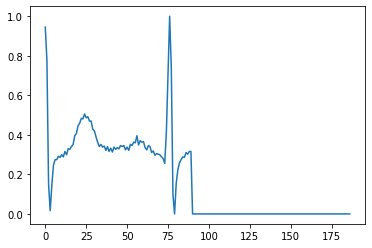

In [ ]:
 plt.plot(sample_187.iloc[0,:187]) #187의 값이 0인 case

In [ ]:
train_df.loc[train_df[187]==0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
10153,0.162791,0.540698,0.755814,0.186047,0.168605,0.546512,0.616279,0.697674,0.651163,0.703488,0.680233,0.732558,0.720930,0.755814,0.750000,0.779070,0.761628,0.813953,0.761628,0.790698,0.779070,0.813953,0.802326,0.848837,0.808140,0.843023,0.837209,0.854651,0.843023,0.912791,0.924419,0.965116,0.941860,1.000000,0.959302,0.947674,0.883721,0.889535,0.837209,0.825581,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
33886,0.990066,0.938742,0.344371,0.034768,0.273179,0.331126,0.326159,0.341060,0.347682,0.347682,0.341060,0.347682,0.355960,0.364238,0.360927,0.367550,0.384106,0.384106,0.389073,0.392384,0.408940,0.417219,0.423841,0.433775,0.448675,0.453642,0.460265,0.463576,0.471854,0.486755,0.488411,0.496689,0.506622,0.518212,0.514901,0.495033,0.476821,0.453642,0.428808,0.407285,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32005,0.974239,0.932084,0.590164,0.131148,0.014052,0.168618,0.238876,0.210773,0.196721,0.208431,0.213115,0.206089,0.208431,0.217799,0.222482,0.208431,0.208431,0.220141,0.224824,0.220141,0.217799,0.227166,0.229508,0.231850,0.238876,0.248244,0.259953,0.259953,0.259953,0.269321,0.283372,0.274005,0.276347,0.288056,0.292740,0.276347,0.259953,0.264637,0.259953,0.238876,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
56159,0.978495,0.723118,0.526882,0.298387,0.220430,0.158602,0.091398,0.091398,0.080645,0.083333,0.080645,0.091398,0.064516,0.083333,0.096774,0.096774,0.091398,0.120968,0.112903,0.129032,0.115591,0.150538,0.147849,0.166667,0.193548,0.212366,0.241935,0.293011,0.282258,0.322581,0.303763,0.325269,0.306452,0.287634,0.260753,0.260753,0.271505,0.284946,0.266129,0.258065,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
61783,0.963351,0.709424,0.060209,0.013089,0.057592,0.041885,0.047120,0.034031,0.039267,0.044503,0.049738,0.044503,0.057592,0.068063,0.057592,0.073298,0.089005,0.078534,0.099476,0.107330,0.123037,0.130890,0.159686,0.157068,0.178010,0.188482,0.204188,0.209424,0.219895,0.212042,0.191099,0.183246,0.143979,0.109948,0.091623,0.083770,0.065445,0.057592,0.057592,0.039267,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49238,1.000000,0.864802,0.673660,0.459207,0.340326,0.242424,0.200466,0.174825,0.107226,0.081585,0.055944,0.041958,0.025641,0.027972,0.000000,0.018648,0.009324,0.025641,0.020979,0.027972,0.032634,0.058275,0.090909,0.160839,0.202797,0.284382,0.349650,0.419580,0.505827,0.557110,0.557110,0.578089,0.592075,0.599068,0.592075,0.615385,0.

In [ ]:
temp=train_df.loc[train_df[187]==0].values 
temp

array([[0.1627907 , 0.54069769, 0.75581396, ..., 0.        , 0.        ,
        0.        ],
       [0.99006623, 0.93874174, 0.34437087, ..., 0.        , 0.        ,
        0.        ],
       [0.97423887, 0.93208432, 0.59016395, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.78448278, 0.375     , ..., 0.        , 0.        ,
        0.        ],
       [0.80191696, 0.61980832, 0.42172524, ..., 0.        , 0.        ,
        0.        ],
       [0.93449783, 0.91266376, 0.40611354, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
temp[:,1:3]

array([[0.54069769, 0.75581396],
       [0.93874174, 0.34437087],
       [0.93208432, 0.59016395],
       ...,
       [0.78448278, 0.375     ],
       [0.61980832, 0.42172524],
       [0.91266376, 0.40611354]])

In [ ]:
temp[:,1:3].flatten()

array([0.54069769, 0.75581396, 0.93874174, ..., 0.42172524, 0.91266376,
       0.40611354])

In [ ]:
## 해당 클래스에 해당하는 모든 ID사람들 plot형태 반환  
def plot_hist(class_number,size,min_,bins):
    img=train_df.loc[train_df[187]==class_number].values ## 해당 class values를 numpy array 형태로 반환해서 image저장
    img=img[:,min_:size] ## 하나의 id 당 min_~size로 보고 싶은 range 지정
    img_flatten=img.flatten() ## 하나의 array로 반환

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


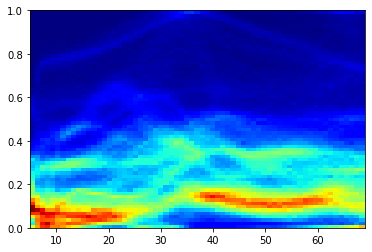

In [ ]:
plot_hist(0,70,5,65)

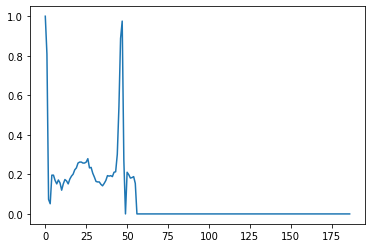

In [ ]:
 plt.plot(sample_187.iloc[1,:187]) ## class 1:  Supraventricular ectopic beats 

1900000
1900000


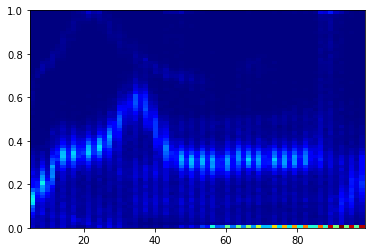

In [ ]:
plot_hist(1,100,5,65) ## class 1:  Supraventricular ectopic beats 

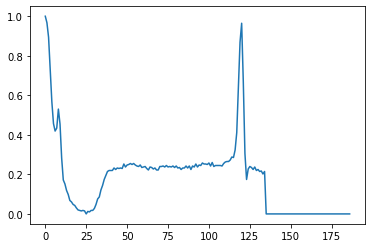

In [ ]:
 plt.plot(sample_187.iloc[2,:187]) ##class2, Ventricular ectopic beats

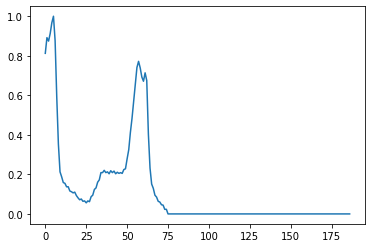

In [ ]:
 plt.plot(sample_187.iloc[3,:187]) ## class3, Fusion Beats

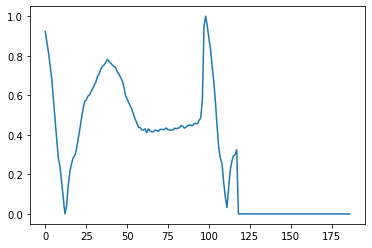

In [ ]:
 plt.plot(sample_187.iloc[4,:187]) ## class4, Unknown Beats

Gaussian noise 

-정규 분포 형태의 noise add

In [ ]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

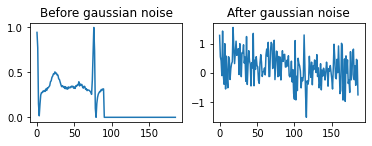

In [ ]:
##예시 class 0인 한에서만
tempo=sample_187.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,2,1)
plt.plot(sample_187.iloc[0,:186])
plt.title("Before gaussian noise")

plt.subplot(2,2,2)
plt.plot(bruiter)
plt.title("After gaussian noise")
plt.show()

In [ ]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values

In [ ]:
X_train

array([[0.1627907 , 0.54069769, 0.75581396, ..., 0.        , 0.        ,
        0.        ],
       [0.99006623, 0.93874174, 0.34437087, ..., 0.        , 0.        ,
        0.        ],
       [0.97423887, 0.93208432, 0.59016395, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79393941, 0.69090909, 0.57727271, ..., 0.        , 0.        ,
        0.        ],
       [0.97739506, 0.93864369, 0.88912809, ..., 0.        , 0.        ,
        0.        ],
       [0.87138265, 0.6141479 , 0.55305469, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_train.shape

(100000, 186)

In [ ]:
y_train.shape

(100000, 5)

In [ ]:
## gaussian noise 적용, train에만 
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])

In [ ]:
 X_train.shape[1] ## feature 갯수

186

In [ ]:
X_train = X_train.reshape(len(X_train), X_train.shape[1],1) ## reshape 함수 적용해서 3차원으로
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
X_train.shape ## reshpae 이후 shape 확인

(100000, 186, 1)

Deep Learning model

-- using keras

In [ ]:
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import AveragePooling1D
from tensorflow.keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings(action='ignore')
import random
from tqdm.notebook import tqdm
from scipy.interpolate import CubicSpline
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, log_loss
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras.optimizers import Adamax, Adam
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Permute,multiply,Add,Multiply,BatchNormalization,Dropout, Conv1D, Input, Flatten, Bidirectional, MaxPooling1D, Activation, Flatten, Dense, Dropout, BatchNormalization, LSTM, TimeDistributed, SpatialDropout1D, GaussianNoise
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.merge import concatenate
from tensorflow.keras.utils import to_categorical, plot_model
import pydot
import graphviz

In [ ]:
def plotLearningCurve(history,epochs,text):
  epochRange = range(1,epochs+1)
  plt.figure(figsize = (5,5))
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy for ' + text)
  plt.xlabel('Epoch', fontsize = 20)
  plt.ylabel('Accuracy', fontsize = 20)
  plt.legend(['Training set','Validation set'])
  plt.show()
  
  plt.figure(figsize = (5,5))
  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss for ' + text)
  plt.xlabel('Epoch', fontsize = 20)
  plt.ylabel('Loss', fontsize = 20)
  plt.legend(['Training set','Validation set'])
  plt.show()

In [ ]:
def cnn_bi_lstm_model(X_train,y_train,X_test,y_test):
    model_1_input = Input(shape=(186,1), dtype='float32') #maxlen gives us the number of temporal slices per data point
    model_1= Conv1D(64, (6), activation='relu')(model_1_input)
    model_1= BatchNormalization()(model_1)
    model_1 = Conv1D(64, (3), activation='relu')(model_1)
    model_1 = BatchNormalization()(model_1)
    model_1= MaxPooling1D(pool_size=(2),strides=(2), padding="same")(model_1)
    model_1 = Flatten()(model_1)
    model_1 = Dense(64, activation='relu')(model_1)
    model_1 = Dense(32, activation='relu')(model_1)
    output_layer = Dense(5, activation='softmax')(model_1)
    final_model = Model(inputs=[model_1_input], outputs=output_layer)

    #Training the LSTM
    final_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10), ModelCheckpoint(filepath='best_model.h5', monitor='val_loss',mode='min', verbose=1, save_best_only=True)]
    history=final_model.fit(X_train,y_train,epochs=30,callbacks=callbacks, batch_size=16,validation_data=(X_test,y_test),shuffle = True)
    final_model.load_weights('best_model.h5')
    return(final_model,history)

In [ ]:
model,history=cnn_bi_lstm_model(X_train,y_train,X_test,y_test)

Epoch 1/30
6246/6250 [============================>.] - ETA: 0s - loss: 0.9187 - accuracy: 0.6493
Epoch 00001: val_loss improved from inf to 1.14939, saving model to best_model.h5
6250/6250 [==============================] - 30s 5ms/step - loss: 0.9186 - accuracy: 0.6494 - val_loss: 1.1494 - val_accuracy: 0.5693
Epoch 2/30
6246/6250 [============================>.] - ETA: 0s - loss: 0.8141 - accuracy: 0.6925
Epoch 00002: val_loss improved from 1.14939 to 1.06748, saving model to best_model.h5
6250/6250 [==============================] - 26s 4ms/step - loss: 0.8142 - accuracy: 0.6924 - val_loss: 1.0675 - val_accuracy: 0.6020
Epoch 3/30
6248/6250 [============================>.] - ETA: 0s - loss: 0.7708 - accuracy: 0.7091
Epoch 00003: val_loss improved from 1.06748 to 0.99777, saving model to best_model.h5
6250/6250 [==============================] - 27s 4ms/step - loss: 0.7708 - accuracy: 0.7090 - val_loss: 0.9978 - val_accuracy: 0.6134
Epoch 4/30
6239/6250 [============================

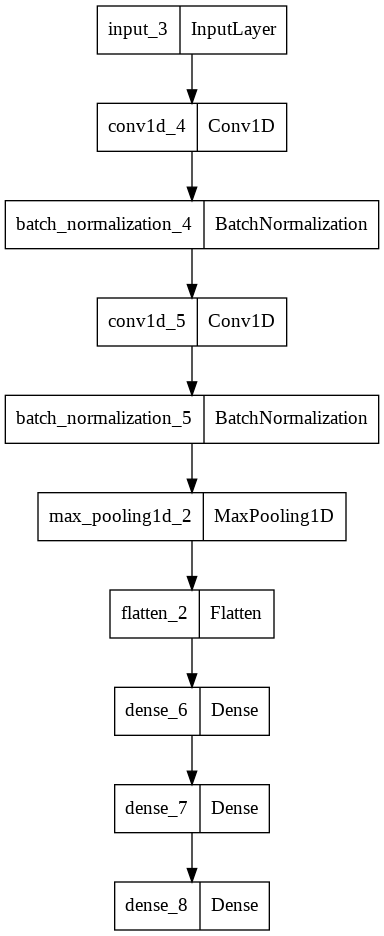

In [ ]:
plot_model(model)

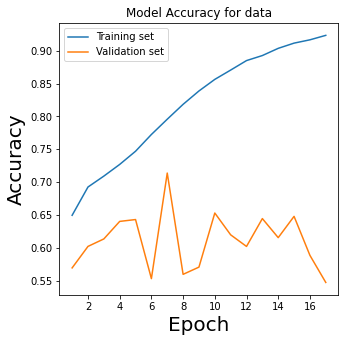

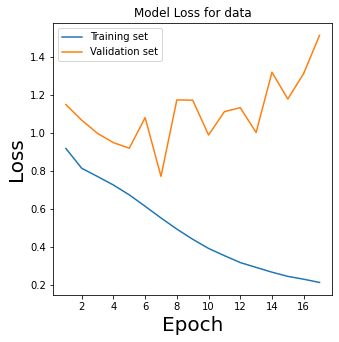

In [ ]:
plotLearningCurve(history,17,"data")